In [1]:
import pandas as pd
df = pd.read_csv("c:/data/rides/rides2.csv")
df.head()

,weekend,num.child,distance,rides,games,wait,clean,overall
0,1,0,114.648259,87,73,60,89,0
1,1,2,27.014097,87,78,76,87,1
2,0,1,63.300975,85,80,70,88,1
3,1,0,25.909931,88,72,66,89,0
4,0,4,54.718307,84,87,74,87,1


c:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: 만족, 1: 불만족)')

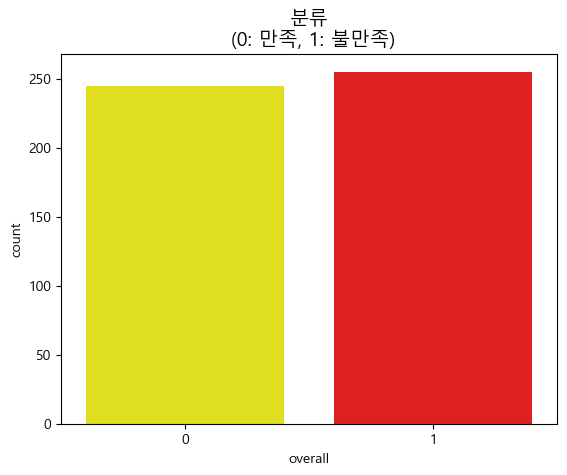

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline
#한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
colors = ["yellow", "red"]
sns.countplot('overall', data=df, palette=colors)
plt.title('분류\n (0: 만족, 1: 불만족)', fontsize=14)

In [3]:
train_cols = df.columns[0:7]
X = df[train_cols] # 독립변수
y = df["overall"]

array([[<AxesSubplot:xlabel='weekend', ylabel='weekend'>,
        <AxesSubplot:xlabel='num.child', ylabel='weekend'>,
        <AxesSubplot:xlabel='distance', ylabel='weekend'>,
        <AxesSubplot:xlabel='rides', ylabel='weekend'>,
        <AxesSubplot:xlabel='games', ylabel='weekend'>,
        <AxesSubplot:xlabel='wait', ylabel='weekend'>,
        <AxesSubplot:xlabel='clean', ylabel='weekend'>,
        <AxesSubplot:xlabel='overall', ylabel='weekend'>],
       [<AxesSubplot:xlabel='weekend', ylabel='num.child'>,
        <AxesSubplot:xlabel='num.child', ylabel='num.child'>,
        <AxesSubplot:xlabel='distance', ylabel='num.child'>,
        <AxesSubplot:xlabel='rides', ylabel='num.child'>,
        <AxesSubplot:xlabel='games', ylabel='num.child'>,
        <AxesSubplot:xlabel='wait', ylabel='num.child'>,
        <AxesSubplot:xlabel='clean', ylabel='num.child'>,
        <AxesSubplot:xlabel='overall', ylabel='num.child'>],
       [<AxesSubplot:xlabel='weekend', ylabel='distance'>,
       

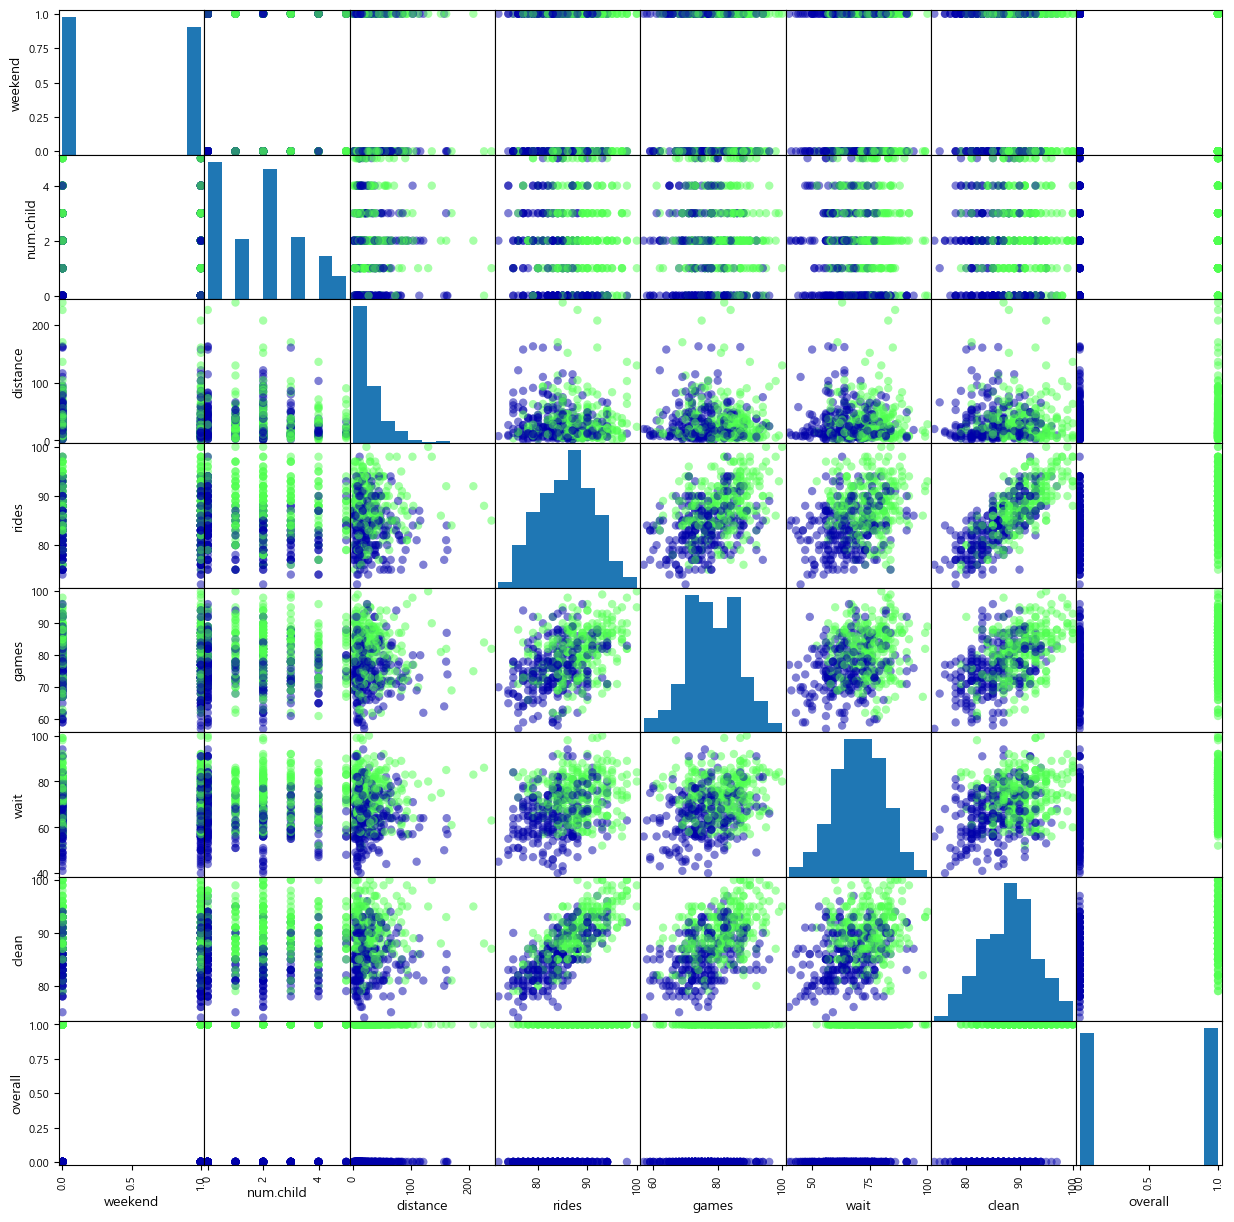

In [4]:
import mglearn
#산점도 행렬 출력
pd.plotting.scatter_matrix(df, c=y, figsize=(15, 15),marker='o', cmap=mglearn.cm3)

In [5]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['overall'])
df_samp=pd.concat([X_samp,y_samp],axis=1)
df_samp["overall"].value_counts()

0    245
1    245
Name: overall, dtype: int64

In [6]:
X = df_samp[train_cols] # 독립변수
y = df_samp["overall"]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
# 분류 모델 구현 함수
def make_model(input_number, hidden_layers, output_number):
    #모델 초기화
    model = Sequential()
    model.add(Dense(hidden_layers[0], activation="relu", input_shape=(input_number,), name="Hidden-1"))
    model.add(Dense(hidden_layers[1], activation="relu", name="Hidden-2"))
    model.add(Dense(hidden_layers[2], activation="relu", name="Hidden-3"))
    #드롭아웃 계층 Dropout(p) p라는 확률로
    # 출력 노드의 신호를 보내다 말다 함, 과적합 방지
    model.add(Dropout(0.2))
    #출력층
    model.add(Dense(output_number, activation="sigmoid", name='output'))
    model.compile(loss="mse", optimizer="adam", metrics=["accuracy"])
    return model

In [9]:
model = make_model(len(X_train.columns), [128,64,32], 1)

<AxesSubplot:>

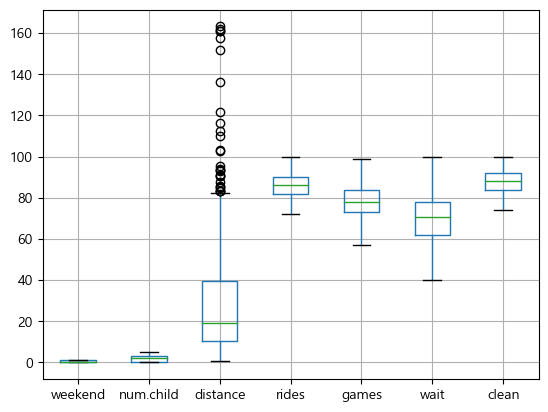

In [10]:
X_train.boxplot()

[[1.         0.         0.10977143 ... 0.5952381  0.16666667 0.65384615]
 [1.         0.4        0.13554088 ... 0.28571429 0.43333333 0.19230769]
 [0.         0.6        0.06495305 ... 0.5        0.48333333 0.30769231]
 ...
 [0.         0.6        0.0730179  ... 0.66666667 0.68333333 0.73076923]
 [1.         0.4        0.41020732 ... 0.33333333 0.3        0.5       ]
 [1.         0.4        0.31775348 ... 0.4047619  0.68333333 0.46153846]]


<AxesSubplot:>

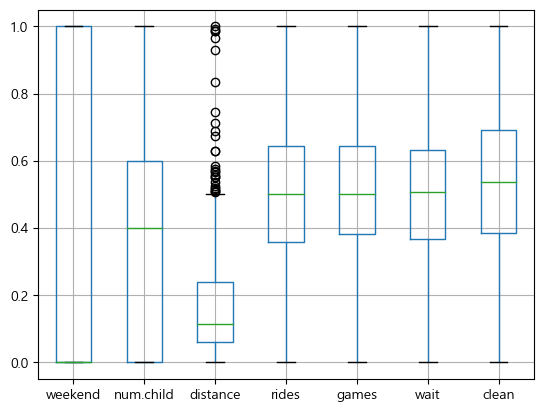

In [11]:
#0~1 범위 변환
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train) #패턴분석 학습용
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled)
df3=pd.DataFrame(X_train_scaled,columns=train_cols)
df3.boxplot()

In [12]:
from datetime import datetime 
import tensorflow as tf 
logdir="c:/logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")  
logdir

'c:/logs/20230417-125642'

In [13]:
from keras.callbacks import EarlyStopping 
tb = tf.keras.callbacks.TensorBoard(log_dir=logdir) 
es = EarlyStopping(monitor='val_loss', patience=5) #조기학습종료
hist = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100,callbacks=[tb,es])

Epoch 1/100
10/10 [==============================] - 1s 26ms/step - loss: 0.2465 - accuracy: 0.4920 - val_loss: 0.2334 - val_accuracy: 0.5570
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 0.2413 - accuracy: 0.5495 - val_loss: 0.2294 - val_accuracy: 0.6962
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 0.2317 - accuracy: 0.6230 - val_loss: 0.2172 - val_accuracy: 0.6709
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 0.2230 - accuracy: 0.6677 - val_loss: 0.2086 - val_accuracy: 0.7342
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 0.2110 - accuracy: 0.7220 - val_loss: 0.1962 - val_accuracy: 0.7848
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 0.1983 - accuracy: 0.7668 - val_loss: 0.1853 - val_accuracy: 0.7595
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 0.1885 - accuracy: 0.7444 - val_loss: 0.1764 - val_accuracy: 0.7595
Epoch 8/100


In [14]:
# 모델 학습
hist = model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1008 - accuracy: 0.8469
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1130 - accuracy: 0.8367
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1077 - accuracy: 0.8571
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1016 - accuracy: 0.8444
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1042 - accuracy: 0.8444
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1016 - accuracy: 0.8495
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1029 - accuracy: 0.8342
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0981 - accuracy: 0.8546
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1026 - accuracy: 0.8444
Epoch 10/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0992 - accuracy: 0.8571
Epoch 11/

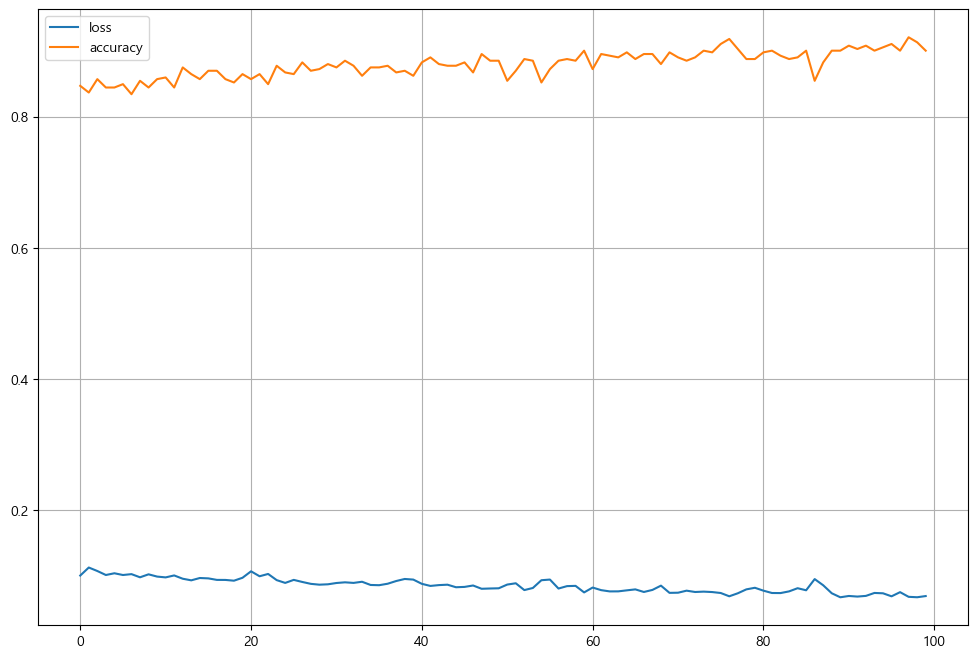

In [15]:
# 모델 학습 과정 표시
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) #손실률
plt.plot(hist.history['accuracy']) #정확도
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()

In [16]:
# 모델 평가
scores = model.evaluate(X_train_scaled, y_train, verbose=1)
print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
#학습용

13/13 [==============================] - 0s 3ms/step - loss: 0.0648 - accuracy: 0.9184
[0.06476783752441406, 0.918367326259613]
accuracy: 91.84%


In [17]:
scores = model.evaluate(X_test_scaled, y_test, verbose=1)
print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
#검증용

4/4 [==============================] - 0s 3ms/step - loss: 0.1559 - accuracy: 0.7959
[0.1558752954006195, 0.795918345451355]
accuracy: 79.59%


In [24]:
model.save('c:/data/rides/rides_keras.model')
model.save_weights('c:/data/rides/rides.weight')
model.save('c:/data/rides/rides.h5')

INFO:tensorflow:Assets written to: c:/data/rides/rides_keras.model\assets


INFO:tensorflow:Assets written to: c:/data/rides/rides_keras.model\assets


In [19]:
pred=model.predict(X_test_scaled[:5])
pred

1/1 [==============================] - 0s 88ms/step


array([[0.9899372 ],
       [0.00136675],
       [0.20974106],
       [0.5413574 ],
       [0.9019294 ]], dtype=float32)

In [20]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
#새로운 값 예측(주말여부, 자녀수, 거리, 놀이기구만족도, 게임만족도, 대기시간, 청결도)
#test_set = np.array([0, 2, 20, 84, 78, 67, 89]).reshape(1,7)
test_set = [[0, 2, 20, 84, 78, 67, 89]]
test_set_scaled=scaler.transform(test_set)
print(model.predict(test_set_scaled)) # 1일 확률 0%

1/1 [==============================] - 0s 22ms/step
[[0.85155]]


c:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [21]:
#새로운 값 예측(주말여부, 자녀수, 거리, 놀이기구만족도, 게임 만족도, 대기시간, 청결도)
test_set = np.array([1, 0, 10, 90, 78, 67, 89]).reshape(1,7)
test_set_scaled=scaler.transform(test_set)
print(model.predict(test_set_scaled)) # 1일 확률 0%

1/1 [==============================] - ETA: 0s

c:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 23ms/step
[[0.09915219]]


In [22]:
import joblib
#scaler 백업
joblib.dump(scaler, 'c:/data/rides/scaler.sav')

['c:/data/rides/scaler.sav']

In [23]:
#scaler 복원
scaler = joblib.load('c:/data/rides/scaler.sav')